In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy.fftpack
import scipy.signal

In [2]:
df_6_10 = pd.read_csv('rh6_U_10_d')

In [4]:
df_6_10.head(5)
#df_6_10.drop(['0'],axis=1,inplace=True)

0.33401             (4.15049 -0.0829771 0)             (4.94725 0.881765 0)             (4.21623 -0.637497 0)             (6.0793 1.57686 0)             (5.22511 -0.914662 0)             (6.81895 -0.527456 0)             (5.28415 0.909146 0)             (1.998 0.0759411 0)             (2.07945 -0.0659785 0)             (6.00455 0.0372131 0)             (4.06766 -0.424273 0)             (2.03484 0.0998322 0)             (2.06218 0.0713227 0)             (4.84201 1.06251 0)             (4.5088 0.154728 0)             (6.69802 1.1789 0)             (5.12826 1.08514 0)             (4.85562 0.869775 0)             (5.05676 0.792587 0)
0        0.33402             (4.14477 -0.0800406 ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
1        0.33403             (4.13884 -0.0770154 ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
2        0.33404             (4.1329 -0.0740321 0...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
3        0.33405             (4.12725 -0.0710602 ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
4        0.33406             (4.12205 -0.0681687 ...

In [5]:
n_probes = 18
n_time = 3000

In [6]:
df_6_10.head(5)

0.33401             (4.15049 -0.0829771 0)             (4.94725 0.881765 0)             (4.21623 -0.637497 0)             (6.0793 1.57686 0)             (5.22511 -0.914662 0)             (6.81895 -0.527456 0)             (5.28415 0.909146 0)             (1.998 0.0759411 0)             (2.07945 -0.0659785 0)             (6.00455 0.0372131 0)             (4.06766 -0.424273 0)             (2.03484 0.0998322 0)             (2.06218 0.0713227 0)             (4.84201 1.06251 0)             (4.5088 0.154728 0)             (6.69802 1.1789 0)             (5.12826 1.08514 0)             (4.85562 0.869775 0)             (5.05676 0.792587 0)
0        0.33402             (4.14477 -0.0800406 ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
1        0.33403             (4.13884 -0.0770154 ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
2        0.33404             (4.1329 -0.0740321 0...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
3        0.33405             (4.12725 -0.0710602 ...                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 
4        0.33406             (4.12205 -0.0681687 ...

In [213]:
c = np.linspace(1,57,78)
c = [int(i) for i in c]
c = [str(i) for i in c]
c.insert(0,'Time')


In [214]:
arr = np.linspace(1,(n_probes*3+1),(n_probes+1))
arr2 = np.linspace(2,(n_probes*3+2),(n_probes+1))
arr3 = np.linspace(3,(n_probes*3+3),(n_probes+1))

In [215]:
df_6_10_mean = df_6_10.mean()
df_6_10_mean

Unnamed: 0    386598.500000
1                  7.853230
2                  0.036545
3                  0.000000
4                  7.854776
5                  0.109745
6                  0.000000
7                  8.024805
8                 -0.082819
9                  0.000000
10                 8.725104
11                -0.047588
12                 0.000000
13                 9.121687
14                -0.022381
15                 0.000000
16                 9.594717
17                -0.004055
18                 0.000000
19                 9.605346
20                 0.064392
21                 0.000000
22                 3.000810
23                -0.150920
24                 0.000000
25                 3.061905
26                -0.176444
27                 0.000000
28                 9.969703
29                 0.028221
30                 0.000000
31                 7.666355
32                -0.022200
33                 0.000000
34                 2.968400
35                 0

In [191]:
df_6_10_mean = df_6_10.mean()
arr = [int(a) for a in arr]
arr2 = [int(a) for a in arr2]
arr3 = [int(a) for a in arr3]
arr = [str(a) for a in arr]
arr2 = [str(a) for a in arr2]
arr3 = [str(a) for a in arr3]
arr

['1',
 '4',
 '7',
 '10',
 '13',
 '16',
 '19',
 '22',
 '25',
 '28',
 '31',
 '34',
 '37',
 '40',
 '43',
 '46',
 '49',
 '52',
 '55']

In [192]:
df_6_10_u_fluc = np.zeros(((n_probes+1),(n_time+1)))
i = 0
j = 0
for a,i in zip(arr,range(0,(n_probes+1))):
    for k,j in zip(df_6_10[a],range(0,(n_time+1))):
        y = k - df_6_10_mean[a]
        df_6_10_u_fluc[i][j] = y

In [81]:
N = 3000
# sample spacing
T = 1.0 / 100000
x = np.linspace(0.0, N*T, N)
y = df_6_10_u_fluc[0]
yf = scipy.fftpack.fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

/home/adutta/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  import sys


In [172]:
fs = 100000
f, Pxx_den = scipy.signal.periodogram(df_6_10_u_fluc[0], fs)

/home/adutta/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


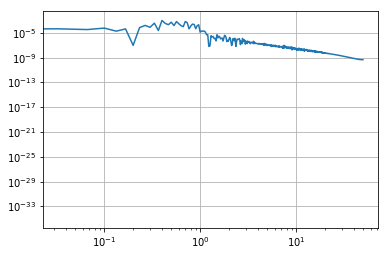

In [173]:
fsx = f*0.01/10
plt.loglog(fsx,Pxx_den)
plt.grid('on')

In [93]:
fsx

array([0.00000000e+00, 3.33222259e-02, 6.66444518e-02, ...,
       4.99166944e+01, 4.99500167e+01, 4.99833389e+01])

In [193]:
df_6_10_v_fluc = np.zeros(((n_probes+1),(n_time+1)))
i = 0
j = 0
for a,i in zip(arr2,range(0,(n_probes+1))):
    for k,j in zip(df_6_10[a],range(0,(n_time+1))):
        y = k - df_6_10_mean[a]
        df_6_10_v_fluc[i][j] = y

/home/adutta/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


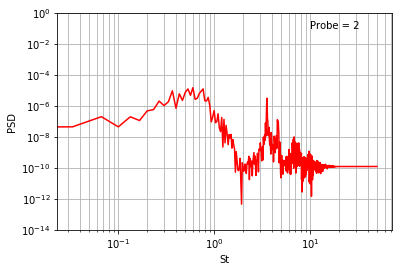

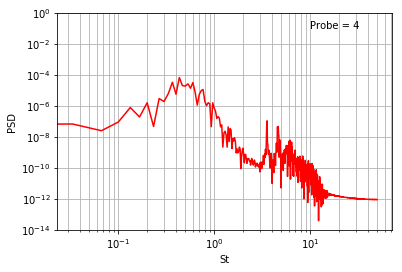

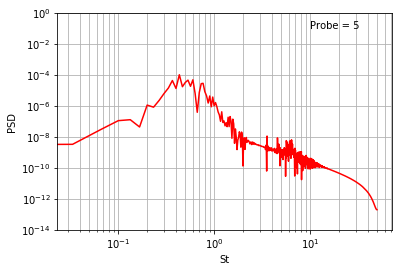

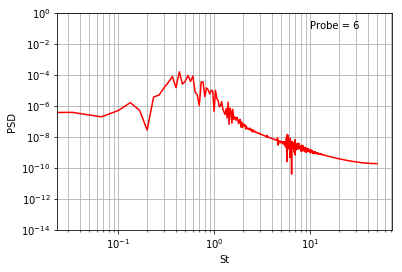

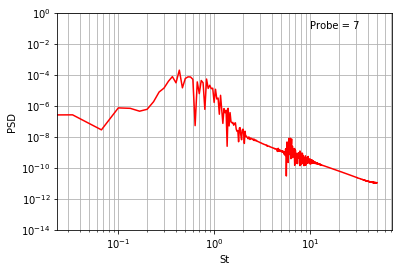

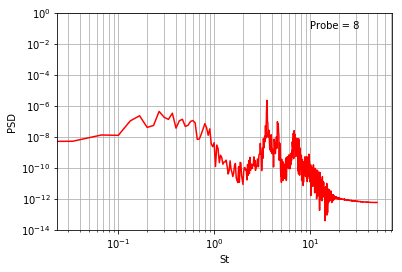

In [196]:
for i in range(0,8):
    plt.figure()
    f, Pxx_v_den = scipy.signal.periodogram(df_6_10_v_fluc[i], fs)
    fsx = f*0.01/10
    k = str(i+1)
    plt.loglog(fsx,Pxx_v_den,'r')
    plt.ylim(1e-14,1)
    plt.minorticks_on
    plt.grid('on',which='both')
    plt.xlabel('St')
    plt.ylabel('PSD')
    plt.text(10,0.1,"Probe = "+k)
    plt.savefig(k)